# pymrio - EXIOBASE 2.2 Tutorial

by Konstantin Stadler

This tutorial exemplifies the use of pymrio with EXIOBASE 2.2.
For a more general introduction (installation, data access) check the basic tutorial.

## Preperation

Download EXIBASE. Soon EXIOBASE should be available for the public (http://www.exiobase.eu), for now people with access to the indecol K drive can use the version from:
K:\indecol\Projects\CREEA\EXIOBASE2.0 Model\EXIOBASE\recent source files

The next step is to download and import pymrio

In [1]:
import sys
_pymrio_path = r'S:\pymrio-master'  
if not _pymrio_path in sys.path:
    sys.path.append(_pymrio_path)
del _pymrio_path

import pymrio as mr

## Parsing EXIOBASE

EXIOBASE comes in a product by product (pxp) and industry by industry version (ixi). For the tutorial we use the pxp. 

EXIOBASE is available in different formats (coefficients, transactions). The pymrio parser works with the transaction format.

We following command parses EXIOBASE and returns a IOSystem object with all extensions and impacts available:

In [2]:
pxp = mr.parse_exiobase22(
    path = r'S:\data\CREEA\raw\pxp_exiobase22', 
    iosystem = 'pxp', 
    version = 'exiobase 2.2', 
    charact = r'S:\data\CREEA\raw\pxp_exiobase22\characterisation_CREEA_version2.2.0.xlsx')



The path points to the download folder, charact to the characterisation matrix within the folder, iosystem and version can contain any string.

The whole parsing process takes about 40 seconds and requires 1 GB of RAM (depending on your hardware configuration).

## Calculating the system and extension results

The following command checks for missing parts in the system and calculates them. In case of the parsed EXIOBASE this includes A, L, multipliers M, footprint accounts, ...

In [3]:
pxp.calc_all()

This takes about 2 minutes and requires another 4 GB of RAM (about half of that is release upon completion).

## Exploring the results

We can visualize the A-matrix:

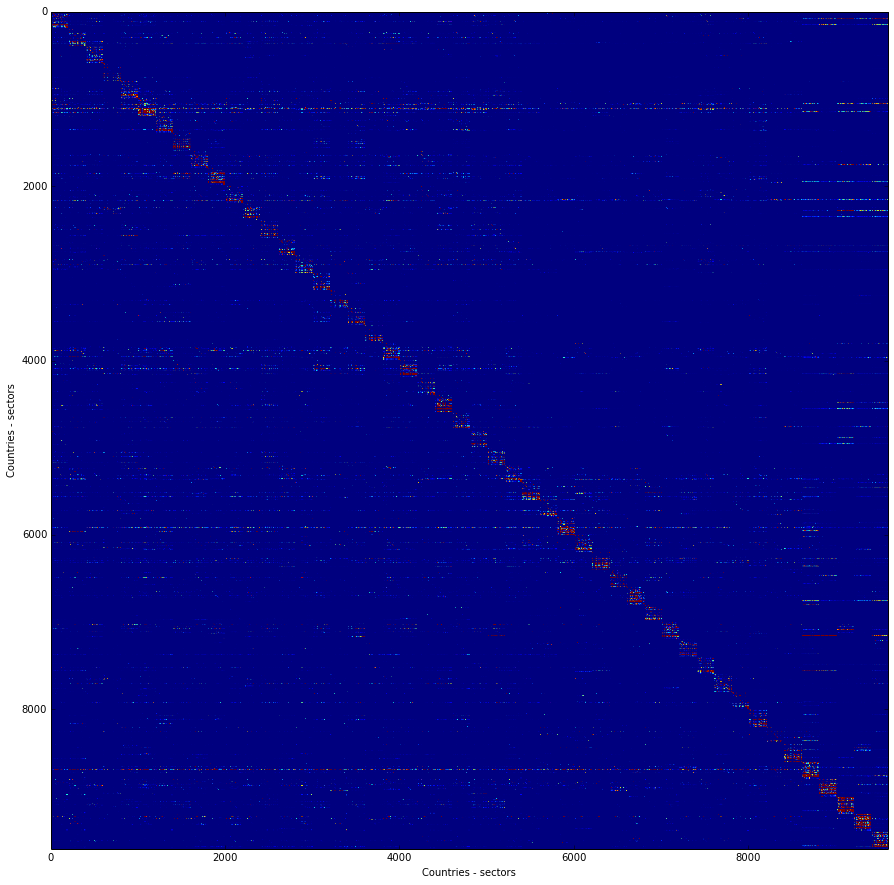

In [4]:
figsize(15,15)
imshow(pxp.A, vmax=1E-3)
xlabel('Countries - sectors')
ylabel('Countries - sectors')

Lets see what impact data is available.

In [5]:
list(pxp.impacts.get_rows())

['Value Added',
 'Employment',
 'Employment hour',
 'abiotic depletion (elements, ultimate ultimate reserves)',
 'abiotic depletion (fossil fuels)',
 'abiotic depletion (elements, reserve base)',
 'abiotic depletion (elements, economic reserve)',
 'Landuse increase of land competition',
 'global warming (GWP100)',
 'global warming net (GWP100 min)',
 'global warming net (GWP100 max)',
 'global warming (GWP20)',
 'global warming (GWP500)',
 'ozone layer depletion (ODP steady state)',
 'ozone layer depletion (ODP5)',
 'ozone layer depletion (ODP10)',
 'ozone layer depletion (ODP15)',
 'ozone layer depletion (ODP20)',
 'ozone layer depletion (ODP25)',
 'ozone layer depletion (ODP30)',
 'ozone layer depletion (ODP40)',
 'human toxicity (HTP inf)',
 'Freshwater aquatic ecotoxicity (FAETP inf)',
 'Marine aquatic ecotoxicity (MAETP inf)',
 'Freshwater sedimental ecotoxicity (FSETP inf)',
 'Marine sedimental ecotoxicity (MSETP inf)',
 'Terrestrial ecotoxicity (TETP inf)',
 'human toxicity (HTP

Get the carbon footprint data per region:

In [6]:
pxp.impacts.D_fp_reg.ix['global warming (GWP100)']

region
AT        1.449341e+11
BE        1.989137e+11
BG        6.261797e+10
CY        1.555978e+10
CZ        1.470284e+11
DE        1.393655e+12
DK        1.078289e+11
EE        2.379778e+10
...
NO        8.782472e+10
ID        4.550142e+11
ZA        3.546492e+11
WA        1.224006e+12
WL        7.967039e+11
WE        4.929149e+11
WF        6.097841e+11
WM        1.328958e+12
Name: global warming (GWP100), Length: 48, dtype: float64

Lets see the unit

In [7]:
pxp.impacts.unit.ix['global warming (GWP100)']

unit    kg CO2 eq.
Name: global warming (GWP100), dtype: object

### Visualize the data

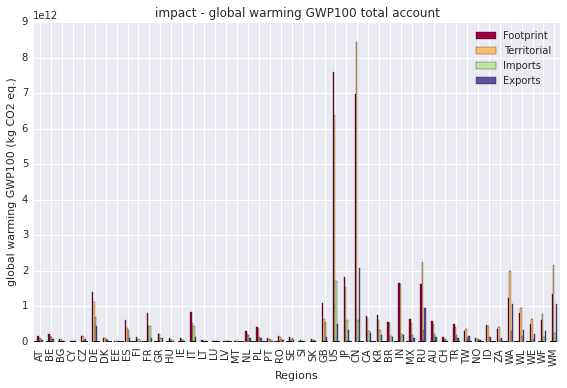

In [8]:
import seaborn # this package is optional - it improves the grahic style
pxp.impacts.plot_account(['global warming (GWP100)'])

### Save and export results

Save the data as txt file (this can take some time...)

In [9]:
pxp.save_all(r'C:\temp\txt', table_format = 'text')

or binary (much faster, especially for reloading afterwards)

In [10]:
pxp.save_all(r'C:\temp\bin', table_format = 'pkl')

Export specific results to other formats

In [11]:
pxp.impacts.D_fp_cap.to_excel(r'C:\temp\capitaresults.xlsx')

In [12]:
pxp.impacts.D_fp_cap.to_html(r'C:\temp\capitaresults.html')

### Aggregation

Let say, we need a smaller system with countries aggregated to EU and BRIC. To do so, first we have to build the aggregation vector:

In [13]:
reg_vector = mr.build_agg_vec(['EU','BRIC','orig_regions'], path='exio2')

In the next step we aggregate the system 

- inplace, to save memory
- recalc everything at one

In [14]:
pxp.aggregate(region_agg=reg_vector, inplace = True, recalc = True)

Visualize the new gwp data

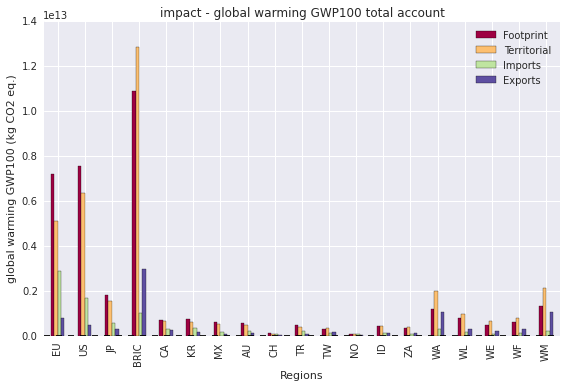

In [15]:
pxp.impacts.plot_account(['global warming (GWP100)'])

and per capita

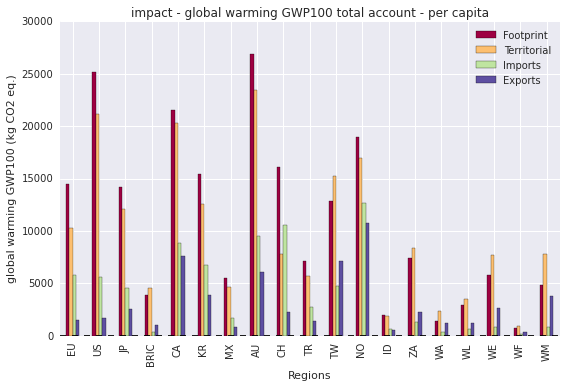

In [16]:
pxp.impacts.plot_account(['global warming (GWP100)'], per_capita = True)